## For evaluating training data

Set the following sub-directory for your folder and file of interest.

In [ ]:
log_folder  = 'best/' 
log_file    = log_folder + 'training_log.json'

The following should work for any size json file, although it expects a certain set of metrics. 

In [3]:
# imports
import json
import pandas as pd
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [9]:
def load_training_logs(filepath):
    dfs = {}
    
    with open(filepath, 'r') as f:
        full_log = json.load(f)

    for sub_name, log_data in full_log.items():
        df = pd.DataFrame({'epoch': log_data.get('epoch', [])})
        df.set_index('epoch', inplace=True)
        metrics = list(log_data.keys())
        if 'epoch' in metrics:
            metrics.remove('epoch')
        # Flatten top-level metrics
        for metric in metrics:
            if metric in log_data:
                df[metric] = log_data[metric]

        dfs[sub_name] = df

    return dfs, list(dfs.keys())

log_dataframes, keys  = load_training_logs(log_file)

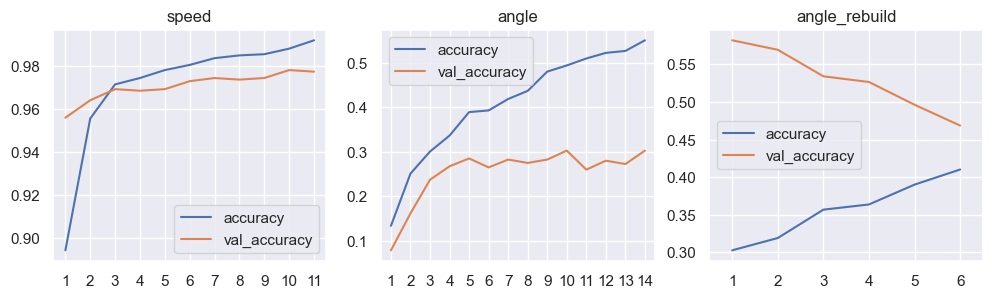

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=len(keys), figsize=(len(keys) * 4, len(keys)))

for i, df_name in enumerate(keys):
    accuracy = log_dataframes[df_name]['accuracy']
    val_accuracy = log_dataframes[df_name]['val_accuracy']
    ax[i].plot(accuracy.index, accuracy.values)
    ax[i].plot(val_accuracy.index, val_accuracy.values)
    ax[i].set_title(keys[i])
    ax[i].legend(['accuracy', 'val_accuracy'])
    ax[i].set_xlim(0.5, len(accuracy.index) + 0.5)
    ax[i].set_xticks(range(1, len(accuracy.index) + 1, 1))
    
plt.savefig(f'{log_folder}/training_logs_accuracy.png')

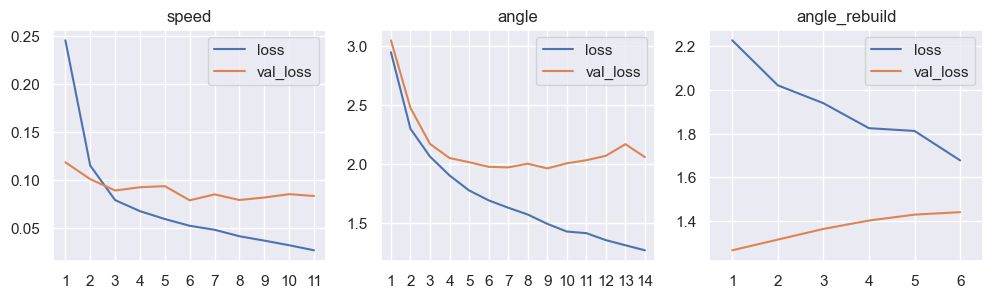

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=len(keys), figsize=(len(keys) * 4, len(keys)))

for i, df_name in enumerate(keys):
    loss = log_dataframes[df_name]['loss']
    val_loss = log_dataframes[df_name]['val_loss']
    ax[i].plot(loss.index, loss.values)
    ax[i].plot(val_loss.index, val_loss.values)
    ax[i].set_title(keys[i])
    ax[i].legend(['loss', 'val_loss'])
    ax[i].set_xlim(0.5, len(loss.index) + 0.5)
    ax[i].set_xticks(range(1, len(loss.index) + 1, 1))
    
plt.savefig(f'{log_folder}/training_logs_loss.png')

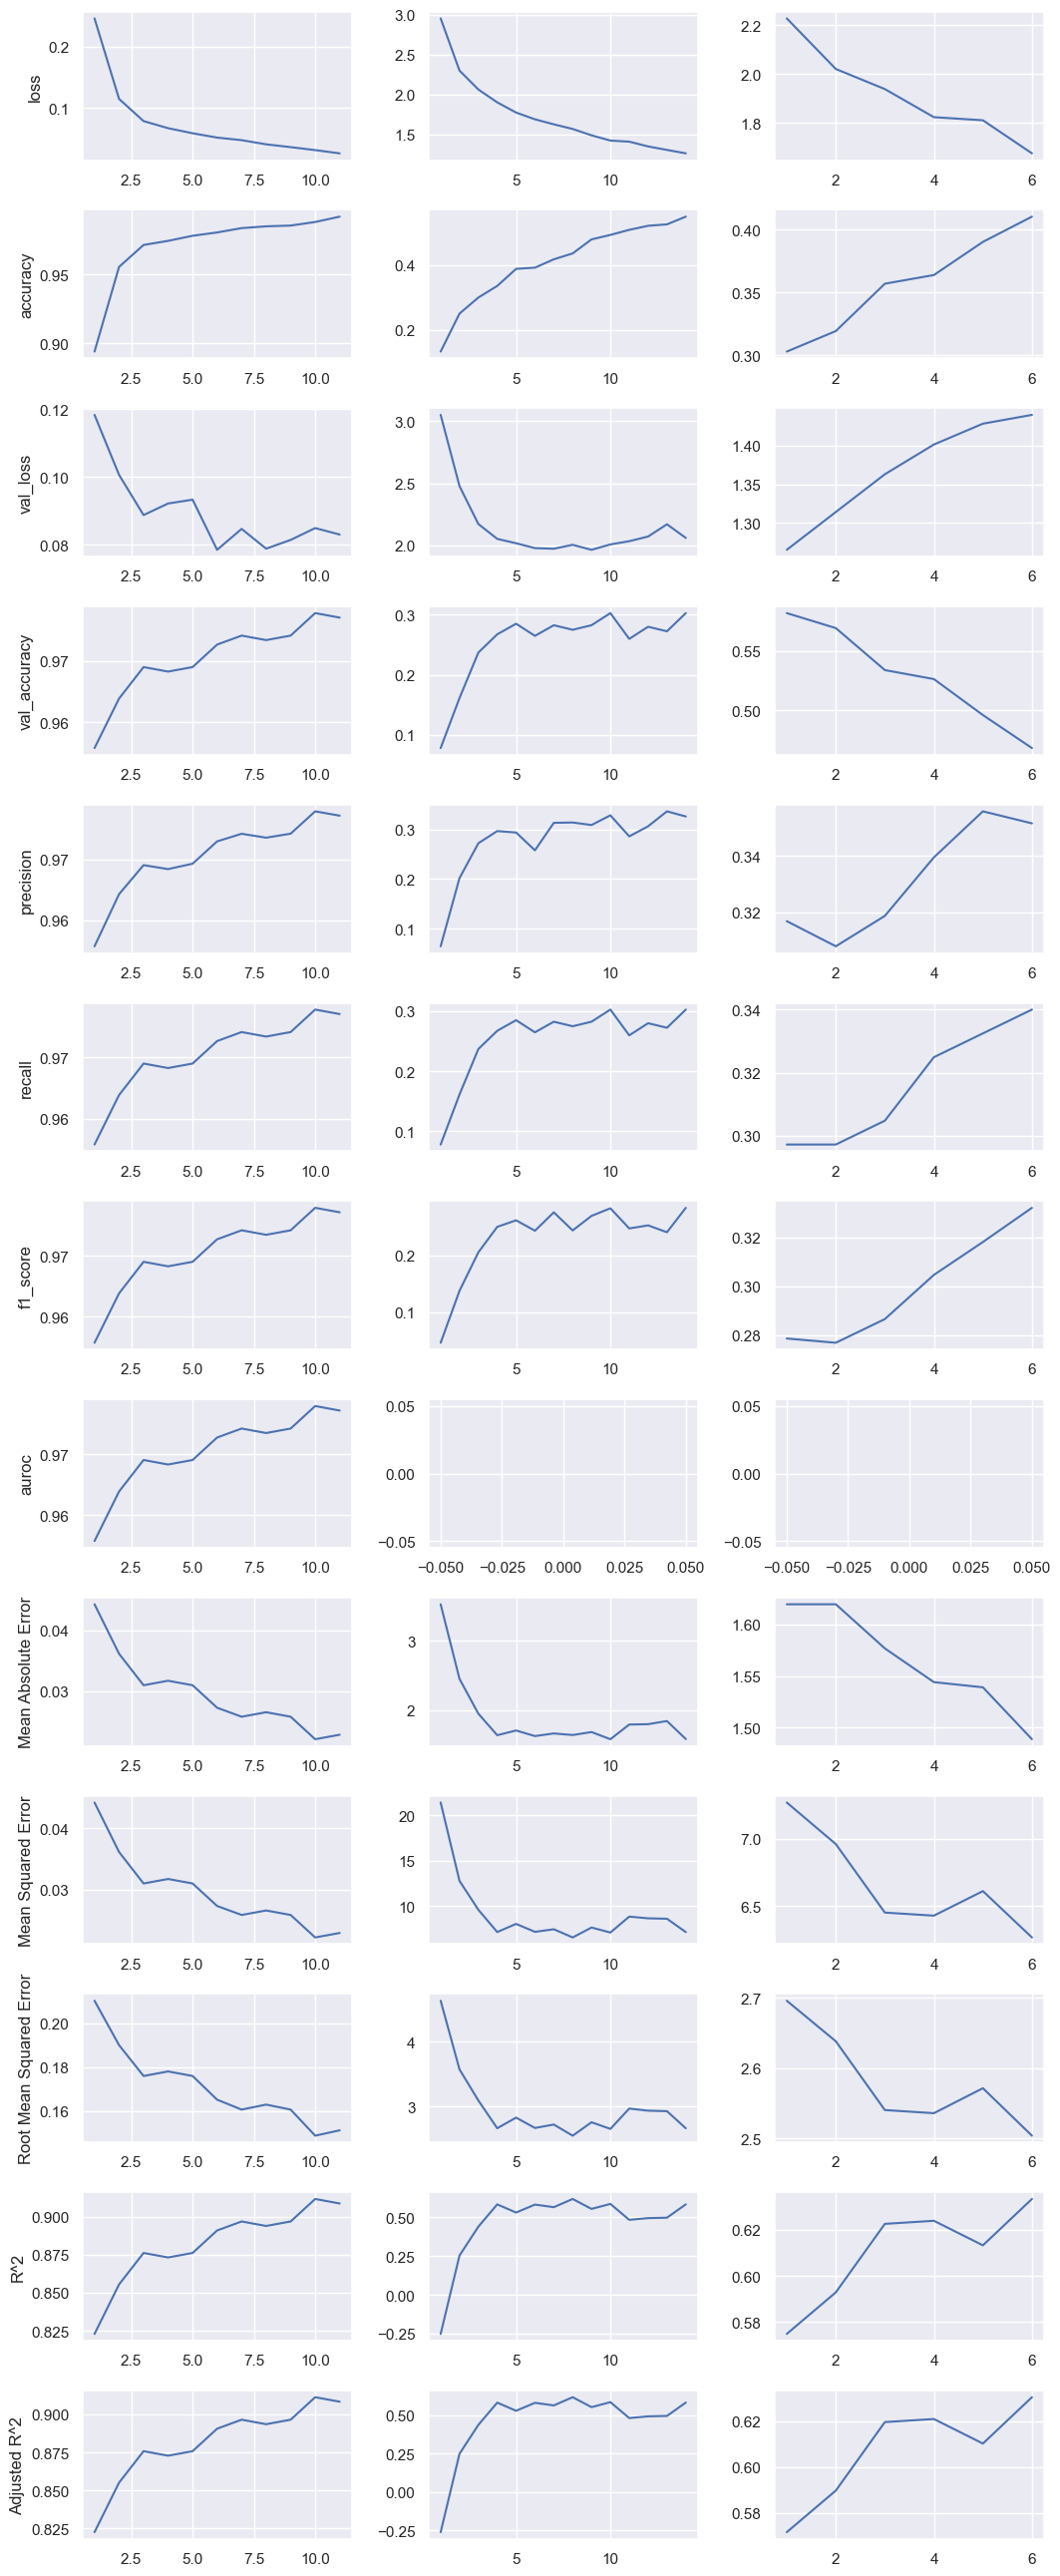

In [12]:
fig, ax = plt.subplots(nrows=len(log_dataframes[keys[0]].columns), ncols=len(keys), figsize=(len(keys) * 3.6, len(log_dataframes[keys[0]].columns) * 2),  tight_layout=True)

for i, df_name in enumerate(keys):
    for j, col in enumerate(log_dataframes[df_name].columns):
        vals = log_dataframes[df_name][col]
        ax[j, i].plot(vals.index, vals.values)
        if i == 0:
            ax[j, i].set_ylabel(col)

plt.savefig(f'{log_folder}/training_logs.png')